In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

from sklearn.svm import SVC

In [ ]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [ ]:
print("Red Wine: ", red_wine['quality'].value_counts().sort_index())
print("White Wine: ",white_wine['quality'].value_counts().sort_index())

wine_data = pd.concat([red_wine, white_wine], ignore_index=True)
wine_data.head()


Red Wine:  quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64
White Wine:  quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


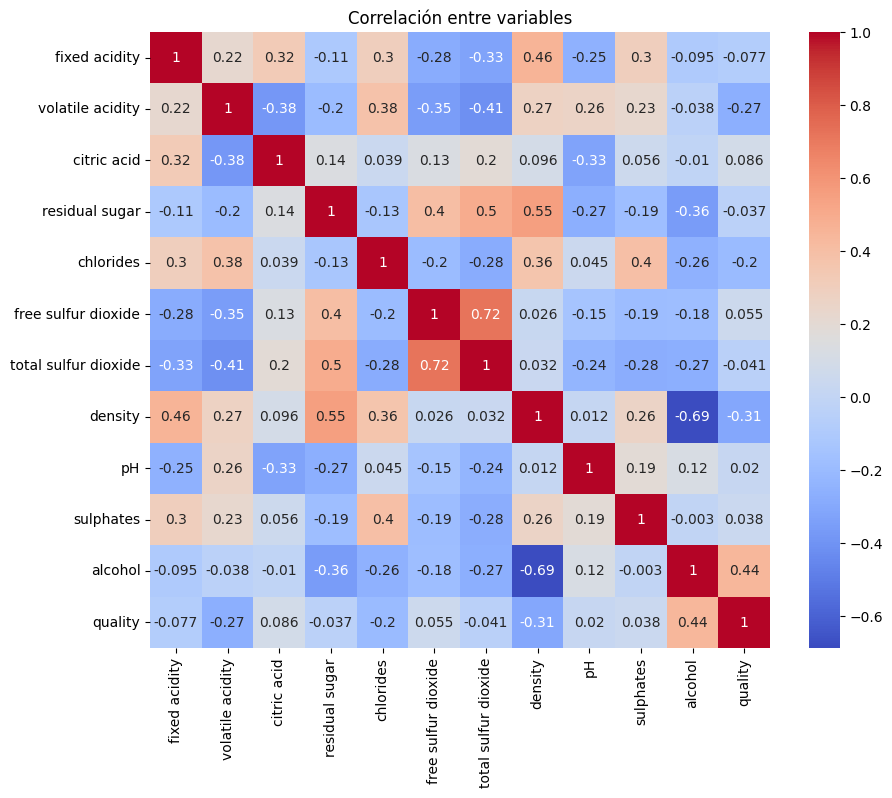

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

In [ ]:

wine_data['quality_label'] = wine_data['quality'].apply(lambda q: 'Baja' if q <= 5 else 'Media' if q <= 7 else 'Alta')
wine_data.drop(columns=["fixed acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "pH","sulphates"])
print("Wine data: ",wine_data['quality'].value_counts().sort_index())
print("Wine data: ",wine_data['quality_label'].value_counts().sort_index())

wine_data.head()

Wine data:  quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64
Wine data:  quality_label
Alta      198
Baja     2384
Media    3915
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Baja
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Baja
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Baja
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Media
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Baja


In [ ]:
X = wine_data.drop(['quality', 'quality_label'], axis=1)
y = wine_data['quality_label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #media 0 y varianza 1

In [ ]:
cls_balanced = wine_data

# Hacer upsampling para igualar clases
max_size = cls_balanced['quality_label'].value_counts().max()
dfs = [resample(cls_balanced[cls_balanced['quality_label'] == i], replace=True, n_samples=max_size, random_state=42)
       for i in ['Baja', 'Media', 'Alta']]

cls_upsampled = pd.concat(dfs)
X = cls_upsampled.drop(['quality', 'quality_label'], axis=1)
y = cls_upsampled['quality_label']

#X = wine_data.drop(['quality', 'quality_label'], axis=1)
#y = wine_data['quality_label']
X_scaled = scaler.fit_transform(X)
print("Wine data: ",cls_upsampled['quality_label'].value_counts().sort_index())

Wine data:  quality_label
Alta     3915
Baja     3915
Media    3915
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Reporte de clasificación:
               precision    recall  f1-score   support

        Baja       0.99      1.00      1.00       778
       Media       0.93      0.94      0.94       798
        Alta       0.94      0.92      0.93       773

    accuracy                           0.95      2349
   macro avg       0.96      0.95      0.95      2349
weighted avg       0.95      0.95      0.95      2349



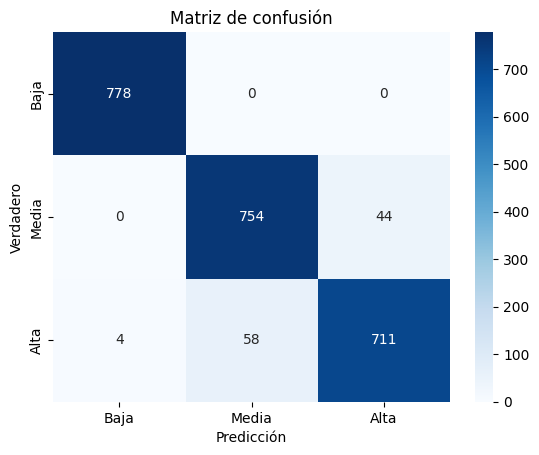

In [ ]:
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=['Baja', 'Media', 'Alta']))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Baja', 'Media', 'Alta'], yticklabels=['Baja', 'Media', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de confusión')
plt.show()


Reporte de clasificación SVM:
               precision    recall  f1-score   support

        Baja       0.79      0.94      0.86       778
       Media       0.78      0.81      0.80       798
        Alta       0.72      0.54      0.62       773

    accuracy                           0.77      2349
   macro avg       0.76      0.77      0.76      2349
weighted avg       0.76      0.77      0.76      2349



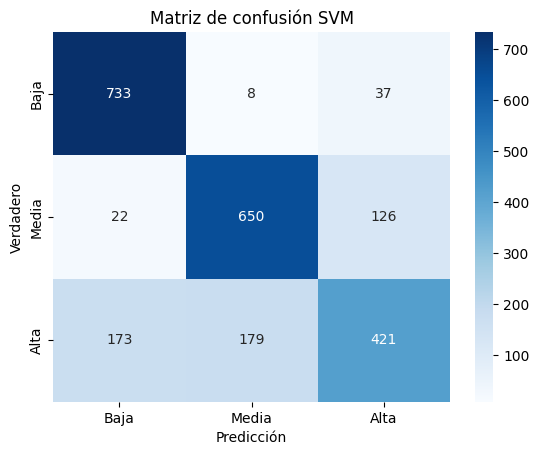

In [ ]:
print("Reporte de clasificación SVM:\n", classification_report(y_test, y_pred_svm, target_names=['Baja', 'Media', 'Alta']))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=['Baja', 'Media', 'Alta'], yticklabels=['Baja', 'Media', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de confusión SVM')
plt.show()